In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [5]:
f = r.TFile("./gm2nearline_ana.root")
t = f.Get("nearlineHistTree").Get("eventTree")

In [33]:
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :      110 : Total =        15479845 bytes  File  Size =   11570661 *
*        :          : Tree compression factor =   1.34                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :      110 : Total  Size=       1007 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   4.98     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :      110 : Total  Size=       1022 bytes  File Size  =        107 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   4.87     *
*...................................................

In [6]:
fw = r.TFile("./gm2nearline_ana_weird.root")
tw = fw.Get("nearlineHistTree").Get("eventTree")
tw.SetLineColor(2)

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


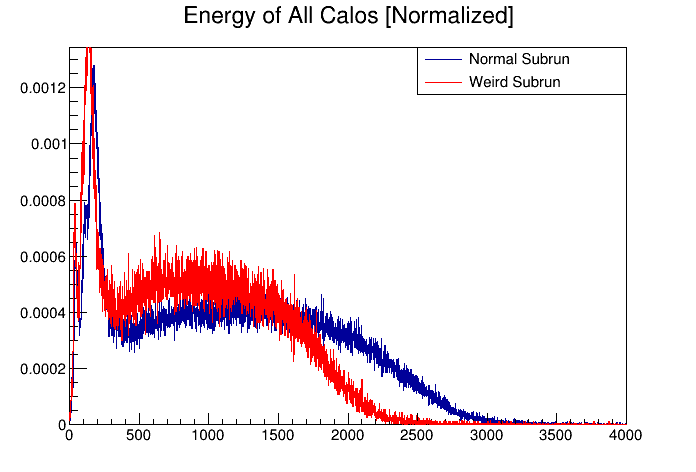

In [12]:
c = r.TCanvas()
h = r.TH1D("h","Energy of All Calos [Normalized]",4000,0,4000)
h2 = h.Clone("h2")
h2.SetLineColor(2)

t.Draw("energy>>h","","goff")
tw.Draw("energy>>h2","","goff")

h.Scale(1/h.GetEntries())
h2.Scale(1/h2.GetEntries())

h.Draw("hist")
h2.Draw("hist same")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(h,"Normal Subrun","l")
leg.AddEntry(h2,"Weird Subrun","l")
leg.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potenti

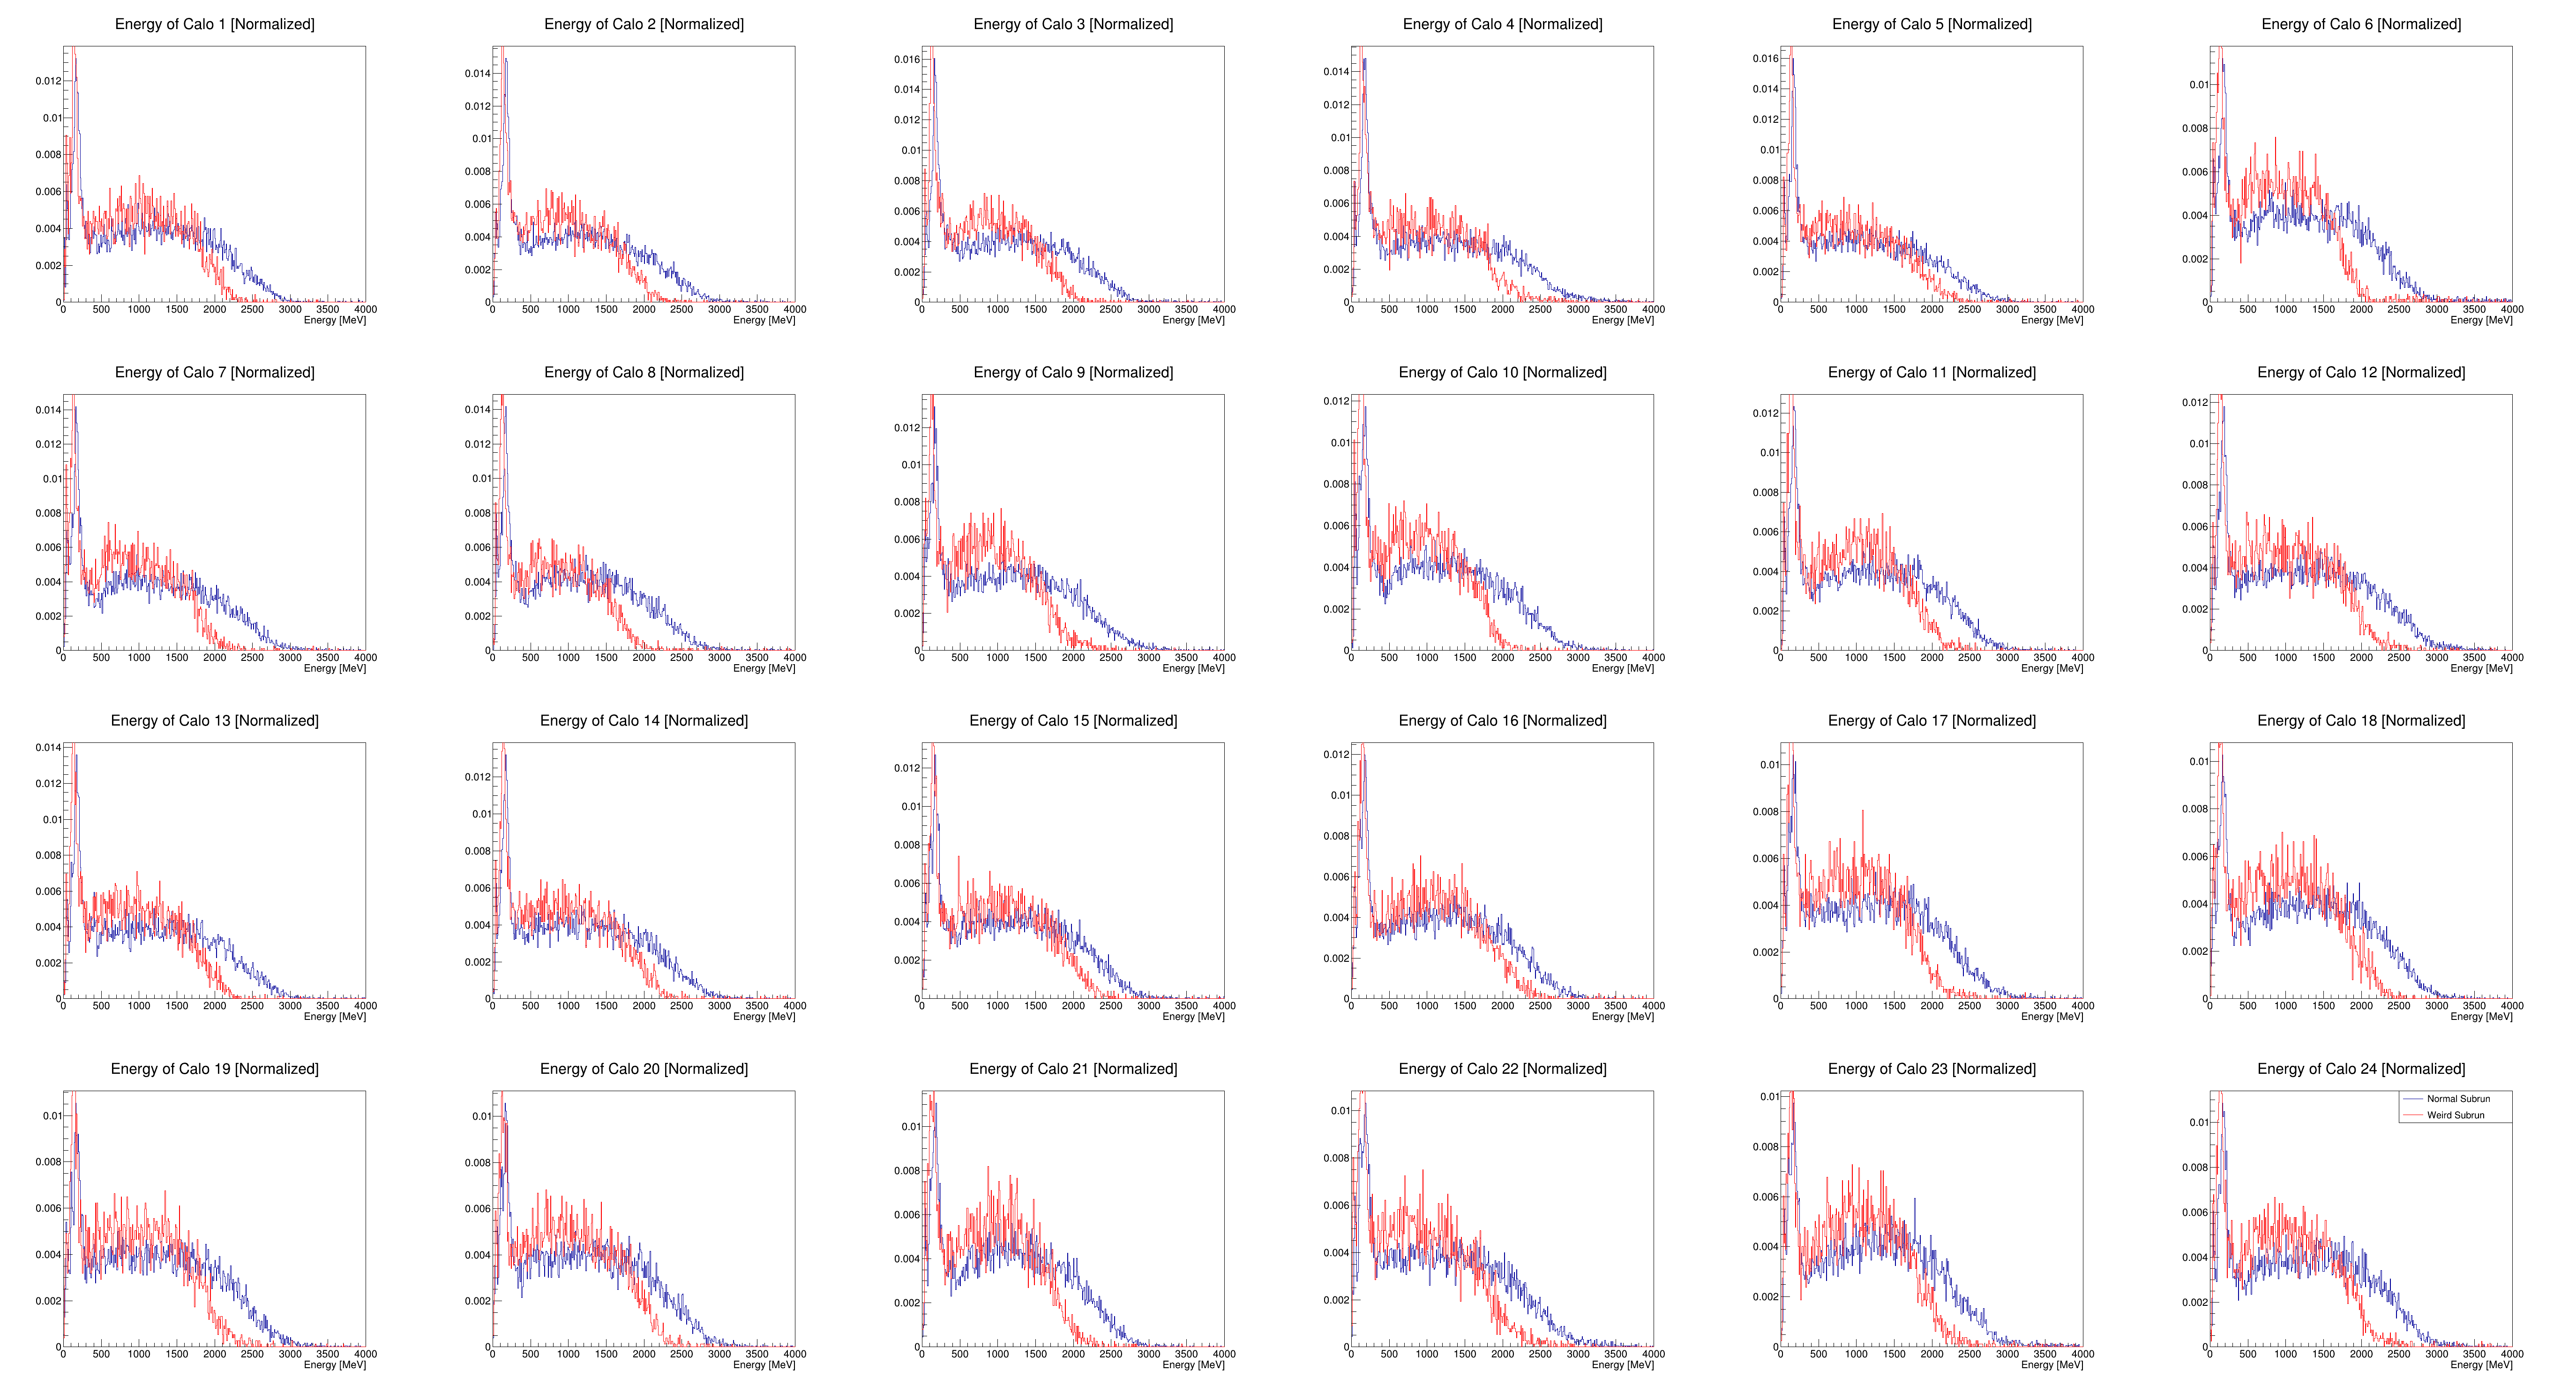

In [19]:
c = r.TCanvas("c","c",5500,3000)
c.Divide(6,4)
hVec = []
h2Vec = []
for calo in range(1,25):
    c.cd(calo)
    
    h = r.TH1D("h","Energy of Calo "+str(calo)+" [Normalized]; Energy [MeV]",400,0,4000)
    h2 = h.Clone("h2")
    h2.SetLineColor(2)

    condition = "caloNum == "+str(calo)
    t.Draw("energy>>h",condition,"goff")
    tw.Draw("energy>>h2",condition,"goff")

    h.Scale(1/h.GetEntries())
    h2.Scale(1/h2.GetEntries())

    h.Draw("hist")
    h2.Draw("hist same")

    leg = r.TLegend(0.6,0.8,0.9,0.9)
    leg.AddEntry(h,"Normal Subrun","l")
    leg.AddEntry(h2,"Weird Subrun","l")
    leg.Draw()
    
    hVec.append(h.Clone("h_"+str(calo)))
    h2Vec.append(h2.Clone("h2_"+str(calo)))
    
    hVec[calo-1].Draw("hist")
    h2Vec[calo-1].Draw("hist same")
    leg.Draw()

    c.Draw()

In [21]:
hMeans = []
h2Means = []
for i, h2 in enumerate(h2Vec):
    h2Means.append(h2.GetMean())
    hMeans.append(hVec[i].GetMean())

Text(0.5, 0, 'Calo Number')

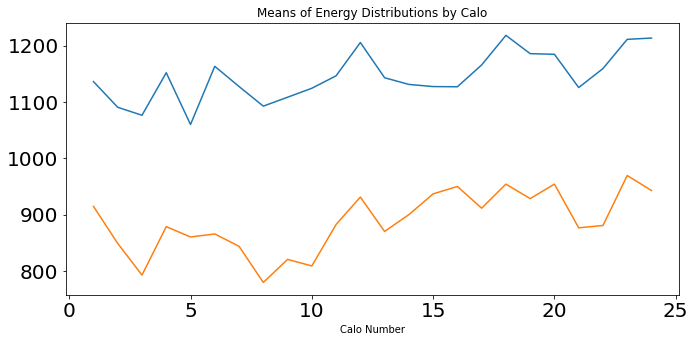

In [23]:
fig, ax = plt.subplots(figsize=(11,5))
plt.plot([x+1 for x in range(len(hMeans))], hMeans, label="Normal")
plt.plot([x+1 for x in range(len(h2Means))], h2Means, label="Weird")
plt.title("Means of Energy Distributions by Calo")
plt.legend()
plt.xlabel("Calo Number")

Text(0.5, 0, 'Calo Number')

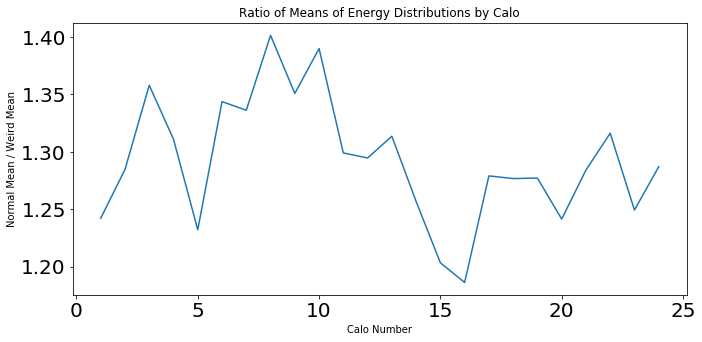

In [24]:
fig, ax = plt.subplots(figsize=(11,5))
plt.plot([x+1 for x in range(len(hMeans))], [x/y for (x,y) in zip(hMeans,h2Means)], label="normal/weird")
plt.title("Ratio of Means of Energy Distributions by Calo")
plt.ylabel("Normal Mean / Weird Mean")
plt.xlabel("Calo Number")

In [26]:
print([x/y for (x,y) in zip(hMeans,h2Means)])

[1.2421723499028867, 1.2846801956202099, 1.3579351315179642, 1.3109433530043817, 1.2321426044313388, 1.3437350608009886, 1.3362091981453348, 1.4014171169918535, 1.3508660398521681, 1.3899100720647253, 1.299042519743507, 1.294653978807842, 1.3135926900271553, 1.2568145497398608, 1.203384416803707, 1.186296486928659, 1.2790566590418828, 1.2767455936273566, 1.2771622130731963, 1.241480929524502, 1.2841056476150003, 1.316240000296254, 1.249339357887973, 1.287054588916809]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potenti

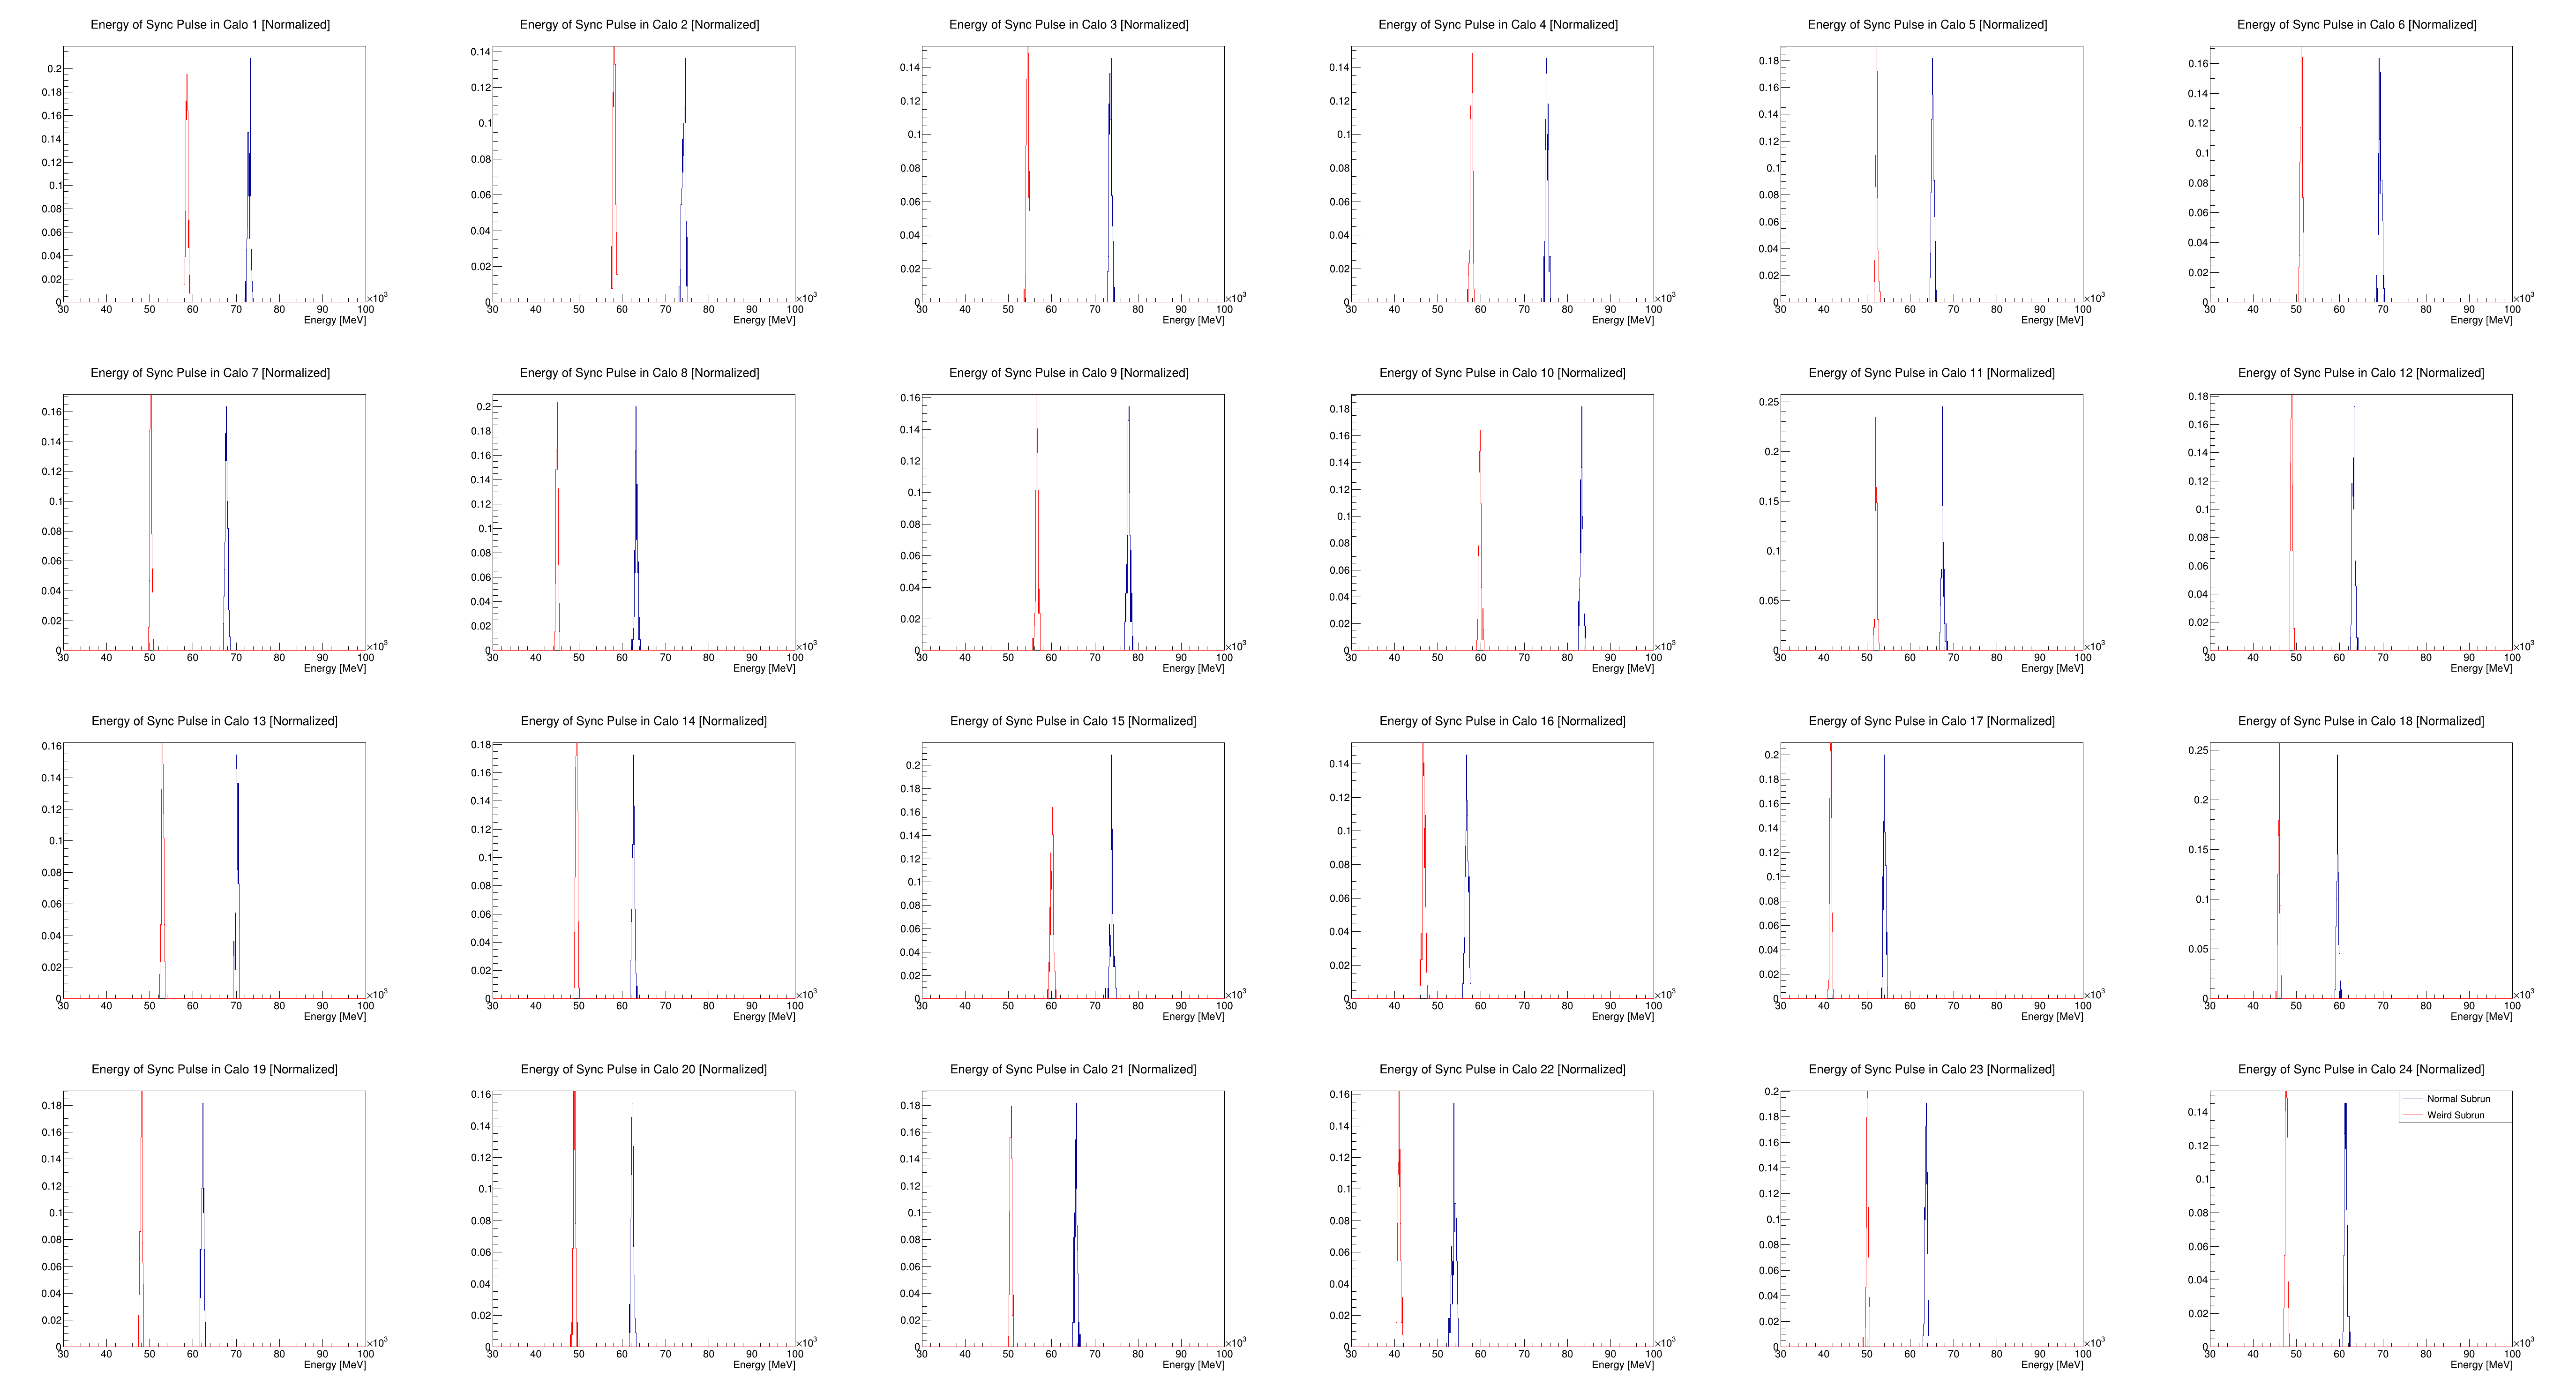

In [28]:
c = r.TCanvas("c","c",5500,3000)
c.Divide(6,4)
hVec = []
h2Vec = []
for calo in range(1,25):
    c.cd(calo)
    
    h = r.TH1D("h","Energy of Sync Pulse in Calo "+str(calo)+" [Normalized]; Energy [MeV]",600,30000,100000)
    h2 = h.Clone("h2")
    h2.SetLineColor(2)

    condition = "caloNum == "+str(calo)+" && time < 0"
    t.Draw("energy>>h",condition,"goff")
    tw.Draw("energy>>h2",condition,"goff")

    h.Scale(1/h.GetEntries())
    h2.Scale(1/h2.GetEntries())

    h.Draw("hist")
    h2.Draw("hist same")

    leg = r.TLegend(0.6,0.8,0.9,0.9)
    leg.AddEntry(h,"Normal Subrun","l")
    leg.AddEntry(h2,"Weird Subrun","l")
    leg.Draw()
    
    hVec.append(h.Clone("h_"+str(calo)))
    h2Vec.append(h2.Clone("h2_"+str(calo)))
    
    hVec[calo-1].Draw("hist")
    h2Vec[calo-1].Draw("hist same")
    leg.Draw()

    c.Draw()

In [29]:
hMeans = []
h2Means = []
for i, h2 in enumerate(h2Vec):
    h2Means.append(h2.GetMean())
    hMeans.append(hVec[i].GetMean())

Text(0.5, 0, 'Calo Number')

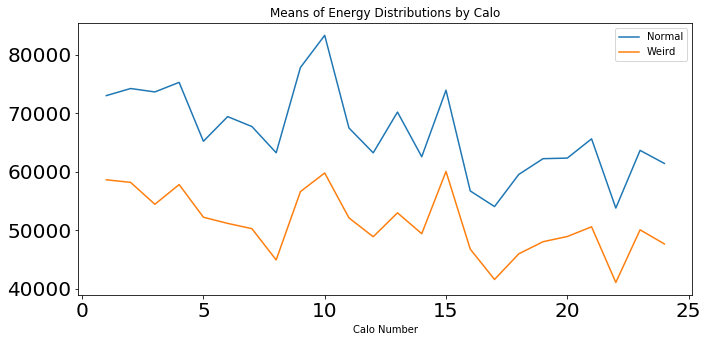

In [30]:
fig, ax = plt.subplots(figsize=(11,5))
plt.plot([x+1 for x in range(len(hMeans))], hMeans, label="Normal")
plt.plot([x+1 for x in range(len(h2Means))], h2Means, label="Weird")
plt.title("Means of Energy Distributions by Calo")
plt.legend()
plt.xlabel("Calo Number")

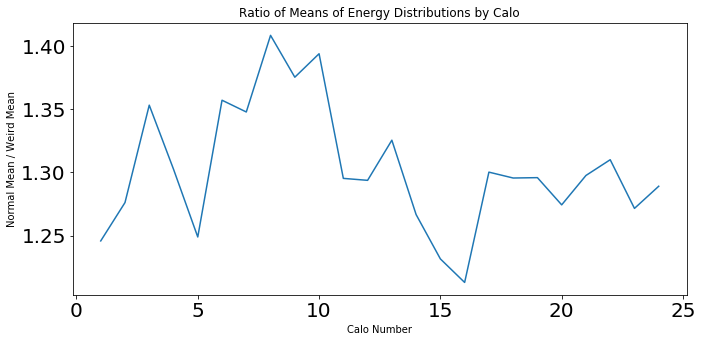

In [32]:
fig, ax = plt.subplots(figsize=(11,5))
plt.plot([x+1 for x in range(len(hMeans))], [x/y for (x,y) in zip(hMeans,h2Means)], label="normal/weird")
plt.title("Ratio of Means of Energy Distributions by Calo")
plt.ylabel("Normal Mean / Weird Mean")
plt.xlabel("Calo Number")
plt.show()